In [1]:
import pandas as pd

data = pd.read_csv("house_prices.csv", index_col=0)
data

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0
...,...,...,...,...,...,...,...,...
168435,Flat,7500000,Bahria Town Karachi,Karachi,3,For Sale,3,8.0
168436,House,8800000,Bahria Town Karachi,Karachi,4,For Sale,3,8.0
168438,House,14000000,Bahria Town Karachi,Karachi,3,For Sale,3,8.0
168439,House,14000000,Bahria Town Karachi,Karachi,4,For Sale,4,14.0


## Add a random feature

In [2]:
import numpy as np

np.random.seed(0)
data["random"] = np.random.random(size=data.shape[0])
data

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla,random
0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0,0.548814
1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6,0.715189
2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0,0.602763
3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0,0.544883
4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0,0.423655
...,...,...,...,...,...,...,...,...,...
168435,Flat,7500000,Bahria Town Karachi,Karachi,3,For Sale,3,8.0,0.363575
168436,House,8800000,Bahria Town Karachi,Karachi,4,For Sale,3,8.0,0.775838
168438,House,14000000,Bahria Town Karachi,Karachi,3,For Sale,3,8.0,0.413120
168439,House,14000000,Bahria Town Karachi,Karachi,4,For Sale,4,14.0,0.354330


## Train/valid/test split

In [3]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.3, random_state=0)
len(train_data), len(test_data)

(69649, 29850)

In [4]:
valid_data, test_data = train_test_split(test_data, test_size=0.5, random_state=0)
valid_data

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla,random
7182,Flat,60000,Clifton,Karachi,2,For Rent,2,7.1,0.161208
152023,House,24000000,G-13,Islamabad,6,For Sale,5,8.0,0.633358
100833,Flat,3200000,Aashiana Road,Lahore,2,For Sale,2,3.0,0.826241
77229,House,8500000,Lake City,Lahore,4,For Sale,4,5.0,0.876261
91321,Flat,5100000,Scheme 33,Karachi,2,For Sale,2,3.6,0.971689
...,...,...,...,...,...,...,...,...,...
157105,House,7400000,Cantt,Lahore,3,For Sale,3,3.5,0.568502
136414,House,7800000,Lalazar,Lahore,3,For Sale,3,3.0,0.861334
14012,House,95000,Bahria Town Rawalpindi,Rawalpindi,7,For Rent,6,20.0,0.646099
77602,Upper Portion,20000,Gulistan-e-Jauhar,Karachi,2,For Rent,2,4.4,0.573815


## Log transformation

In [5]:
train_data["price"]

44749      4000000
128534    29000000
29224      9800000
89063        28000
42944      3800000
            ...   
30618        52500
69578      5950000
64395     13500000
65830     34000000
108078    22500000
Name: price, Length: 69649, dtype: int64

In [6]:
train_data["price"].describe(percentiles=[0.25, 0.5, 0.9, 0.99])

count    6.964900e+04
mean     1.040451e+07
std      1.066323e+07
min      1.550000e+04
25%      1.500000e+05
50%      7.500000e+06
90%      2.550000e+07
99%      4.250000e+07
max      4.490000e+07
Name: price, dtype: float64

<Axes: >

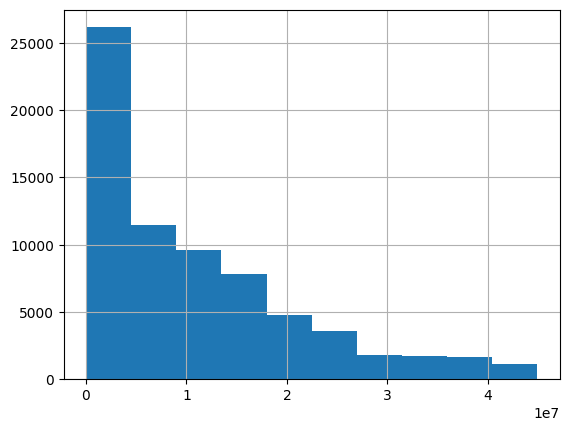

In [7]:
train_data["price"].hist()

<Axes: >

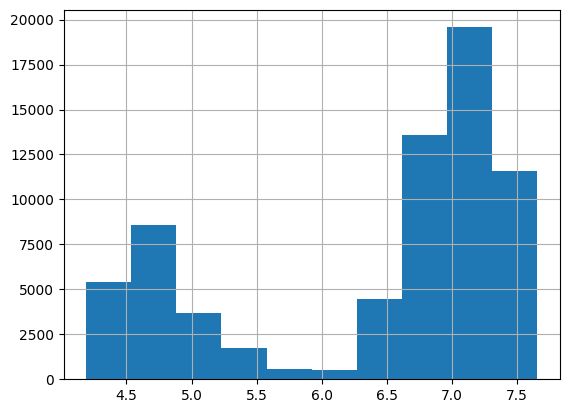

In [8]:
import numpy as np

train_data["price"] = np.log10(train_data["price"])
train_data["price"].hist()

## Discretization

In [9]:
from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins=5, encode="ordinal")
train_data["price"] = discretizer.fit_transform(train_data[["price"]])
# train_set["price"] = train_set[["price"]].astype(int)
train_data

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla,random
44749,Flat,1.0,North Karachi,Karachi,2,For Sale,2,3.6,0.723952
128534,House,4.0,Gulshan-e-Ravi,Lahore,5,For Sale,5,10.0,0.812452
29224,House,2.0,Ghauri Town,Islamabad,3,For Sale,4,7.0,0.917679
89063,Lower Portion,0.0,G-11,Islamabad,2,For Rent,2,5.0,0.864875
42944,Flat,1.0,DHA Defence,Islamabad,2,For Sale,2,3.6,0.030144
...,...,...,...,...,...,...,...,...,...
30618,Flat,0.0,E-11,Islamabad,2,For Rent,2,6.2,0.270109
69578,House,2.0,Shahdara,Lahore,2,For Sale,2,5.0,0.659784
64395,House,3.0,Architects Engineers Housing Society,Lahore,5,For Sale,5,6.0,0.545952
65830,House,4.0,NFC 1,Lahore,7,For Sale,5,20.0,0.024733


<Axes: >

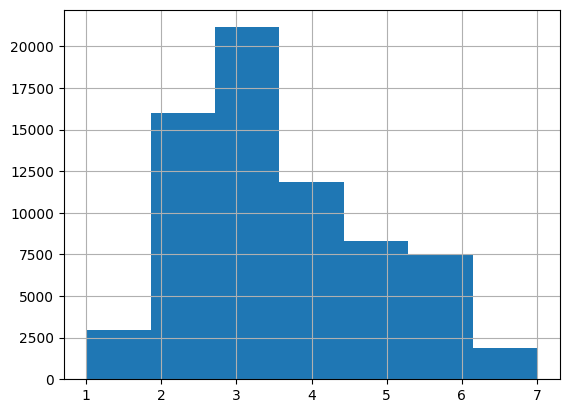

In [10]:
train_data["baths"].hist(bins=7)

<Axes: >

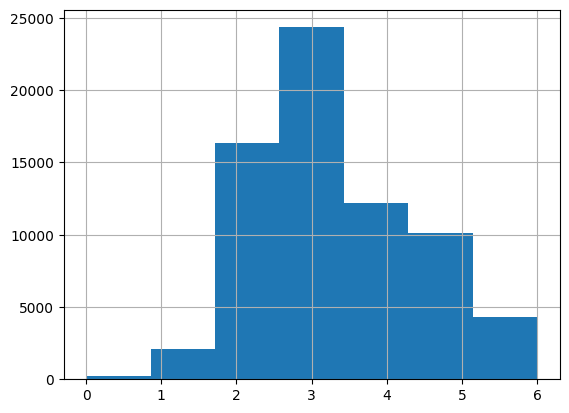

In [11]:
train_data["bedrooms"].hist(bins=7)

## Scaling

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_data[["Area_in_Marla"]])

train_data["area"] = scaler.fit_transform(train_data[["Area_in_Marla"]])
train_data

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla,random,area
44749,Flat,1.0,North Karachi,Karachi,2,For Sale,2,3.6,0.723952,-0.682582
128534,House,4.0,Gulshan-e-Ravi,Lahore,5,For Sale,5,10.0,0.812452,0.166235
29224,House,2.0,Ghauri Town,Islamabad,3,For Sale,4,7.0,0.917679,-0.231648
89063,Lower Portion,0.0,G-11,Islamabad,2,For Rent,2,5.0,0.864875,-0.496903
42944,Flat,1.0,DHA Defence,Islamabad,2,For Sale,2,3.6,0.030144,-0.682582
...,...,...,...,...,...,...,...,...,...,...
30618,Flat,0.0,E-11,Islamabad,2,For Rent,2,6.2,0.270109,-0.337750
69578,House,2.0,Shahdara,Lahore,2,For Sale,2,5.0,0.659784,-0.496903
64395,House,3.0,Architects Engineers Housing Society,Lahore,5,For Sale,5,6.0,0.545952,-0.364275
65830,House,4.0,NFC 1,Lahore,7,For Sale,5,20.0,0.024733,1.492512


In [13]:
train_data["city"].value_counts()

city
Karachi       26065
Lahore        18339
Islamabad     15426
Rawalpindi     8216
Faisalabad     1603
Name: count, dtype: int64

## One-hot

In [14]:
pd.get_dummies(train_data, columns=["location"], dtype=int)

,property_type,price,city,baths,purpose,bedrooms,Area_in_Marla,random,area,location_12th Avenue,...,location_Zaman Colony,location_Zamzama,location_Zaraj Housing Scheme,location_Zeeshan Colony,location_Zero Point,location_Zia Colony,location_Zone 5,location_Zubaida Park,location_Zubair Colony,location_circular road
44749,Flat,1.0,Karachi,2,For Sale,2,3.6,0.723952,-0.682582,0,...,0,0,0,0,0,0,0,0,0,0
128534,House,4.0,Lahore,5,For Sale,5,10.0,0.812452,0.166235,0,...,0,0,0,0,0,0,0,0,0,0
29224,House,2.0,Islamabad,3,For Sale,4,7.0,0.917679,-0.231648,0,...,0,0,0,0,0,0,0,0,0,0
89063,Lower Portion,0.0,Islamabad,2,For Rent,2,5.0,0.864875,-0.496903,0,...,0,0,0,0,0,0,0,0,0,0
42944,Flat,1.0,Islamabad,2,For Sale,2,3.6,0.030144,-0.682582,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30618,Flat,0.0,Islamabad,2,For Rent,2,6.2,0.270109,-0.337750,0,...,0,0,0,0,0,0,0,0,0,0
69578,House,2.0,Lahore,2,For Sale,2,5.0,0.659784,-0.496903,0,...,0,0,0,0,0,0,0,0,0,0
64395,House,3.0,Lahore,5,For Sale,5,6.0,0.545952,-0.364275,0,...,0,0,0,0,0,0,0,0,0,0
65830,House,4.0,Lahore,7,For Sale,5,20.0,0.024733,1.492512,0,...,0,0,0,0,0,0,0,0,0,0


## Hashing trick

In [15]:
from sklearn.feature_extraction.text import HashingVectorizer

hasher = HashingVectorizer(n_features=3, binary=True)
train_data["city"].iloc[:10], hasher.fit_transform(train_data["city"]).todense()[:10]

(44749       Karachi
 128534       Lahore
 29224     Islamabad
 89063     Islamabad
 42944     Islamabad
 48570       Karachi
 86071       Karachi
 114647    Islamabad
 84477     Islamabad
 5647         Lahore
 Name: city, dtype: object,
 matrix([[0., 0., 1.],
         [1., 0., 0.],
         [0., 1., 0.],
         [0., 1., 0.],
         [0., 1., 0.],
         [0., 0., 1.],
         [0., 0., 1.],
         [0., 1., 0.],
         [0., 1., 0.],
         [1., 0., 0.]]))

In [16]:
encoded = hasher.transform(train_data["city"])
encoded = pd.DataFrame(encoded.todense(), columns=[f"city_{i}" for i in range(hasher.n_features)])
encoded = encoded.astype(int)
encoded

,city_0,city_1,city_2
0,0,0,1
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
69644,0,1,0
69645,1,0,0
69646,1,0,0
69647,1,0,0


In [17]:
train_data = pd.concat([train_data, encoded.set_index(train_data.index)], axis=1)
train_data

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla,random,area,city_0,city_1,city_2
44749,Flat,1.0,North Karachi,Karachi,2,For Sale,2,3.6,0.723952,-0.682582,0,0,1
128534,House,4.0,Gulshan-e-Ravi,Lahore,5,For Sale,5,10.0,0.812452,0.166235,1,0,0
29224,House,2.0,Ghauri Town,Islamabad,3,For Sale,4,7.0,0.917679,-0.231648,0,1,0
89063,Lower Portion,0.0,G-11,Islamabad,2,For Rent,2,5.0,0.864875,-0.496903,0,1,0
42944,Flat,1.0,DHA Defence,Islamabad,2,For Sale,2,3.6,0.030144,-0.682582,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30618,Flat,0.0,E-11,Islamabad,2,For Rent,2,6.2,0.270109,-0.337750,0,1,0
69578,House,2.0,Shahdara,Lahore,2,For Sale,2,5.0,0.659784,-0.496903,1,0,0
64395,House,3.0,Architects Engineers Housing Society,Lahore,5,For Sale,5,6.0,0.545952,-0.364275,1,0,0
65830,House,4.0,NFC 1,Lahore,7,For Sale,5,20.0,0.024733,1.492512,1,0,0


## Feature importance

In [18]:
train_data

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla,random,area,city_0,city_1,city_2
44749,Flat,1.0,North Karachi,Karachi,2,For Sale,2,3.6,0.723952,-0.682582,0,0,1
128534,House,4.0,Gulshan-e-Ravi,Lahore,5,For Sale,5,10.0,0.812452,0.166235,1,0,0
29224,House,2.0,Ghauri Town,Islamabad,3,For Sale,4,7.0,0.917679,-0.231648,0,1,0
89063,Lower Portion,0.0,G-11,Islamabad,2,For Rent,2,5.0,0.864875,-0.496903,0,1,0
42944,Flat,1.0,DHA Defence,Islamabad,2,For Sale,2,3.6,0.030144,-0.682582,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30618,Flat,0.0,E-11,Islamabad,2,For Rent,2,6.2,0.270109,-0.337750,0,1,0
69578,House,2.0,Shahdara,Lahore,2,For Sale,2,5.0,0.659784,-0.496903,1,0,0
64395,House,3.0,Architects Engineers Housing Society,Lahore,5,For Sale,5,6.0,0.545952,-0.364275,1,0,0
65830,House,4.0,NFC 1,Lahore,7,For Sale,5,20.0,0.024733,1.492512,1,0,0


In [19]:
valid_data

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla,random
7182,Flat,60000,Clifton,Karachi,2,For Rent,2,7.1,0.161208
152023,House,24000000,G-13,Islamabad,6,For Sale,5,8.0,0.633358
100833,Flat,3200000,Aashiana Road,Lahore,2,For Sale,2,3.0,0.826241
77229,House,8500000,Lake City,Lahore,4,For Sale,4,5.0,0.876261
91321,Flat,5100000,Scheme 33,Karachi,2,For Sale,2,3.6,0.971689
...,...,...,...,...,...,...,...,...,...
157105,House,7400000,Cantt,Lahore,3,For Sale,3,3.5,0.568502
136414,House,7800000,Lalazar,Lahore,3,For Sale,3,3.0,0.861334
14012,House,95000,Bahria Town Rawalpindi,Rawalpindi,7,For Rent,6,20.0,0.646099
77602,Upper Portion,20000,Gulistan-e-Jauhar,Karachi,2,For Rent,2,4.4,0.573815


In [20]:
valid_data["price"] = np.log10(valid_data["price"])
valid_data["price"] = discretizer.transform(valid_data["price"].to_numpy().reshape(-1, 1))

valid_data["Area_in_Marla"] = scaler.transform(valid_data["Area_in_Marla"].to_numpy().reshape(-1, 1))

encoded = hasher.transform(valid_data["city"])
encoded = pd.DataFrame(encoded.todense(), columns=[f"city_{i}" for i in range(hasher.n_features)])
valid_data = pd.concat([valid_data, encoded.set_index(valid_data.index)], axis=1)

valid_data

c:\Users\Sarach\Desktop\Workspace\KU\Courses\67-1\67-262 Machine Learning Systems\Code\lab\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KBinsDiscretizer was fitted with feature names
  warnings.warn(
c:\Users\Sarach\Desktop\Workspace\KU\Courses\67-1\67-262 Machine Learning Systems\Code\lab\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla,random,city_0,city_1,city_2
7182,Flat,0.0,Clifton,Karachi,2,For Rent,2,-0.218385,0.161208,0.0,0.0,1.0
152023,House,4.0,G-13,Islamabad,6,For Sale,5,-0.099020,0.633358,0.0,1.0,0.0
100833,Flat,1.0,Aashiana Road,Lahore,2,For Sale,2,-0.762158,0.826241,1.0,0.0,0.0
77229,House,2.0,Lake City,Lahore,4,For Sale,4,-0.496903,0.876261,1.0,0.0,0.0
91321,Flat,1.0,Scheme 33,Karachi,2,For Sale,2,-0.682582,0.971689,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
157105,House,2.0,Cantt,Lahore,3,For Sale,3,-0.695845,0.568502,1.0,0.0,0.0
136414,House,2.0,Lalazar,Lahore,3,For Sale,3,-0.762158,0.861334,1.0,0.0,0.0
14012,House,1.0,Bahria Town Rawalpindi,Rawalpindi,7,For Rent,6,1.492512,0.646099,0.0,1.0,0.0
77602,Upper Portion,0.0,Gulistan-e-Jauhar,Karachi,2,For Rent,2,-0.576480,0.573815,0.0,0.0,1.0


In [21]:
features =["baths", "bedrooms", "Area_in_Marla", "random"]
label = "price"

train_data[features + [label]]

,baths,bedrooms,Area_in_Marla,random,price
44749,2,2,3.6,0.723952,1.0
128534,5,5,10.0,0.812452,4.0
29224,3,4,7.0,0.917679,2.0
89063,2,2,5.0,0.864875,0.0
42944,2,2,3.6,0.030144,1.0
...,...,...,...,...,...
30618,2,2,6.2,0.270109,0.0
69578,2,2,5.0,0.659784,2.0
64395,5,5,6.0,0.545952,3.0
65830,7,5,20.0,0.024733,4.0


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.inspection import permutation_importance

model = LinearRegression()
model.fit(train_data[features], train_data[label])

importances = permutation_importance(model, valid_data[features], valid_data[label], random_state=0)
importances = pd.Series(importances.importances_mean, index=features).sort_values(ascending=False)
importances

baths            0.249383
bedrooms         0.052352
Area_in_Marla    0.004155
random           0.000038
dtype: float64

<Axes: >

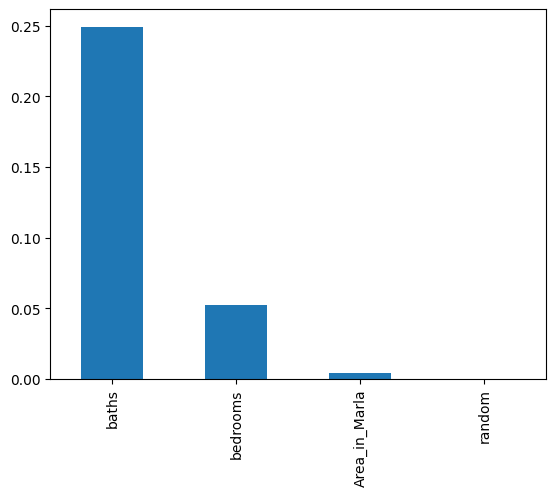

In [23]:
importances.plot(kind="bar")

## Resampling

In [24]:
# !pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

sampler = RandomOverSampler()
X_train_over, y_train_over = sampler.fit_resample(train_data[features], train_data[label])
pd.Series(y_train_over).value_counts()

price
1.0    14136
4.0    14136
2.0    14136
0.0    14136
3.0    14136
Name: count, dtype: int64

In [25]:
from imblearn.under_sampling import RandomUnderSampler

sampler = RandomUnderSampler()
X_train_under, y_train_under = sampler.fit_resample(train_data[features], train_data[label])
pd.Series(y_train_under).value_counts()

price
0.0    13511
1.0    13511
2.0    13511
3.0    13511
4.0    13511
Name: count, dtype: int64